<a href="https://colab.research.google.com/github/saiharshith1918/AI-Project/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lxml_html_clean


In [ ]:
!pip install lxml
from textblob import TextBlob

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from textblob import TextBlob

In [ ]:
!pip install GoogleNews

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 7.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:

# Step 1: Fetch Recent Stock Market Data (Last 1 Year)
def get_stock_data(ticker, start, end):
    data = yf.download(ticker, start=start, end=end)
    return data[['Close']]

# Step 2: Preprocessing (Using StandardScaler)
def preprocess_data(stock_data):
    scaler = StandardScaler()
    stock_scaled = scaler.fit_transform(stock_data)
    return stock_scaled, scaler

# Step 3: Create Training Dataset (Reduce Time Step to 30)
def create_dataset(data, time_step=30):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

# Step 4: Build Optimized LSTM Model
def build_lstm_model():
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(30, 1)),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Step 5: Train & Predict Stock Price (Reduce Timeline)
def train_and_predict(stock_data, stock_scaled, scaler):
    X, y = create_dataset(stock_scaled)
    X_train, y_train = X[:int(len(X) * 0.8)], y[:int(len(y) * 0.8)]
    X_test, y_test = X[int(len(X) * 0.8):], y[int(len(y) * 0.8):]
    X_train, X_test = X_train.reshape(-1, 30, 1), X_test.reshape(-1, 30, 1)

    model = build_lstm_model()
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

    predictions = model.predict(X_test)
    predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    return model, predictions, scaler.inverse_transform(y_test.reshape(-1, 1))

# Step 6: Plot Results
import matplotlib.pyplot as plt
import pandas as pd

def plot_results(y_test, predictions, test_dates):
    # Convert test_dates to Pandas datetime format
    test_dates = pd.to_datetime(test_dates)

    # Define the desired date range
    start_date = pd.Timestamp("2025-02-29")
    end_date = pd.Timestamp("2025-03-29")

    # Filter only the data within the date range
    mask = (test_dates >= start_date) & (test_dates <= end_date)
    filtered_dates = test_dates[mask]
    filtered_y_test = y_test[mask]
    filtered_predictions = predictions[mask]

    # Plot results
    plt.figure(figsize=(14, 5))
    plt.plot(filtered_dates, filtered_y_test, label='Actual Price', marker='o', linestyle='-')
    plt.plot(filtered_dates, filtered_predictions, label='Predicted Price', marker='o', linestyle='--')

    plt.xticks(rotation=45)  # Rotate dates for better readability
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title('Stock Price Prediction (1-Month Range)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Running the Optimized Pipeline
#ticker = 'AAPL'
#start_date = '2025-01-29'
#end_date = '2025-03-29'
#
stock_data = get_stock_data(ticker, start_date, end_date)
stock_scaled, scaler = preprocess_data(stock_data)

model, predictions, y_test = train_and_predict(stock_data, stock_scaled, scaler)
plot_results(y_test, predictions)

# Step 7: Predict Next Day Stock Price
last_30_days = stock_scaled[-30:].reshape(1, 30, 1)
next_day_price = model.predict(last_30_days)
next_day_price = scaler.inverse_transform(next_day_price)

print(f"Predicted Next Day Stock Price: {next_day_price[0][0]}")


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - loss: 2.2326 - val_loss: 0.3846
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 747ms/step - loss: 2.1085 - val_loss: 0.3502
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 1.9993 - val_loss: 0.3126
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 1.9693 - val_loss: 0.2744
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 1.9201 - val_loss: 0.2367
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - loss: 1.8722 - val_loss: 0.2002
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 1.6892 - val_loss: 0.1656
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 1.5890 - val_loss: 0.1334
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 1.4845 - val_loss: 0.1035
Epoch 10/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 1.3509 - val_loss: 0.0771
Epoch 11/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - loss: 1.1922 - val_loss: 0.0534
Epoch 12/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step - loss: 0.9662 - val_loss:

TypeError: plot_results() missing 1 required positional argument: 'test_dates'

In [ ]:
def plot_results(y_test, predictions, test_dates):
    plt.figure(figsize=(14,5))
    plt.plot(test_dates, y_test, label='Actual Price')
    plt.plot(test_dates, predictions, label='Predicted Price')
    plt.xticks(rotation=45)  # Rotate dates for better readability
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

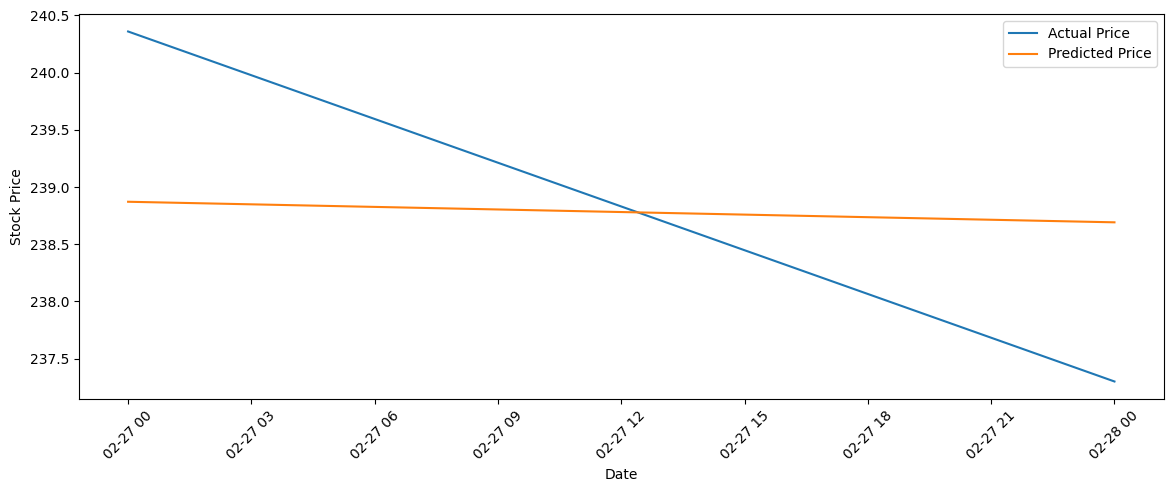

In [ ]:
test_dates = stock_data.index[-len(y_test):]  # Get dates for test data
plot_results(y_test, predictions, test_dates)

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf

def get_current_stock_price(ticker):
    stock = yf.Ticker(ticker)  # Fetch stock data
    current_price = stock.history(period="1d")['Close'].iloc[-1]  # Get latest closing price
    return current_price


In [ ]:
ticker = "AAPL"  # Change to any stock symbol
current_price = get_current_stock_price(ticker)
print(f"Current {ticker} Stock Price: ${current_price:.2f}")


Current AAPL Stock Price: $217.90


In [ ]:
import matplotlib.pyplot as plt

def plot_results(y_test, predictions, test_dates, current_price):
    plt.figure(figsize=(14, 5))
    plt.plot(test_dates, y_test, label='Actual Price')
    plt.plot(test_dates, predictions, label='Predicted Price')
    plt.axhline(y=current_price, color='r', linestyle='--', label=f'Current Price: ${current_price:.2f}')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()


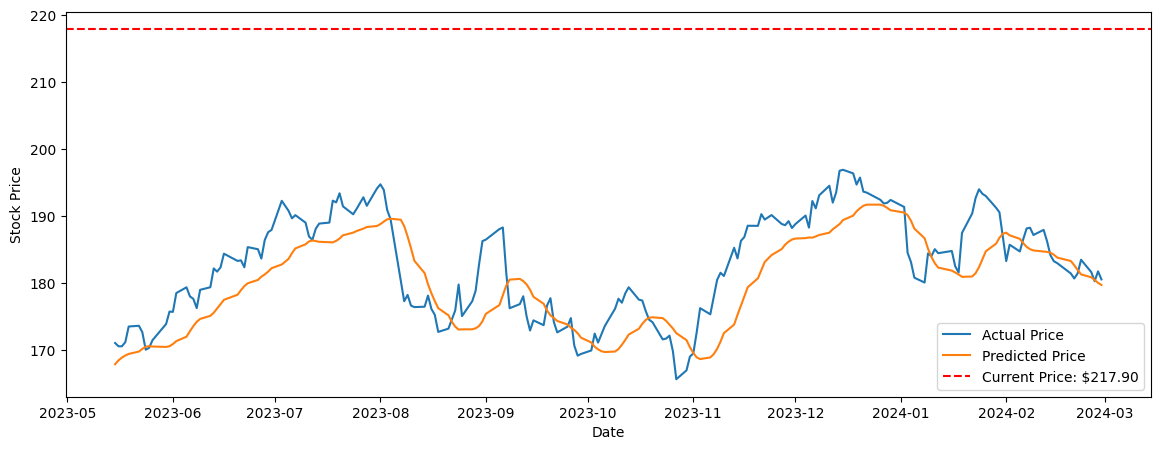

In [ ]:
plot_results(y_test, predictions, test_dates,current_price)